In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gold_data.shape

(2290, 6)

In [ ]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
correlation = gold_data.corr()

<AxesSubplot:>

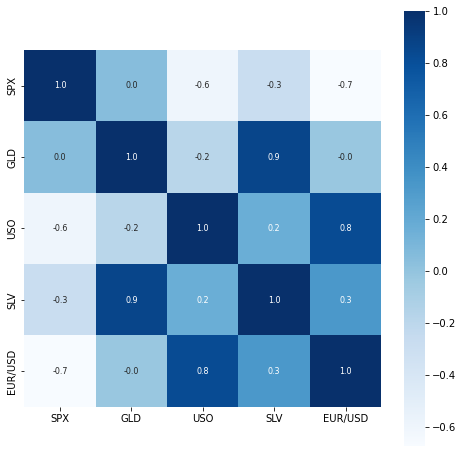

In [ ]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

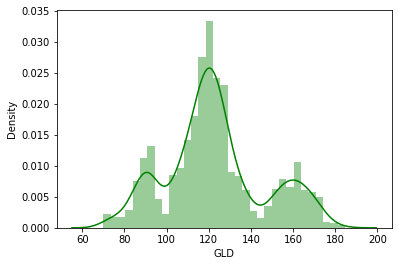

In [ ]:
sns.distplot(gold_data['GLD'],color='green')

In [ ]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.59019972  81.8553001  116.03200031 127.71710051 120.85950128
 154.5821974  150.30939856 126.13380021 117.41979879 126.05640076
 116.62080093 171.59670074 141.79359836 168.16589863 115.30329996
 117.93610067 137.89640335 170.36810094 159.74020272 159.44459952
 155.23440044 125.3124002  175.40649991 157.00170397 125.23720058
  93.90379968  77.92729994 120.34380003 119.05449939 167.56679987
  88.10920012 125.21449973  91.09190061 117.49480015 121.1039993
 136.05870091 115.38940127 115.3028006  146.21270011 107.0809009
 104.2167027   87.19429784 126.45540088 118.05749999 154.62999893
 119.63029994 108.36349997 108.07039809  93.09790032 127.13379776
  74.53430066 113.69569929 121.38569986 111.12859896 118.78789894
 120.69799969 159.08370082 168.6271013  147.0648973   86.07709883
  94.29820041  86.92959884  90.4686006  118.99510069 126.42440102
 127.67530022 169.63760003 122.28429936 117.17389919  98.78100052
 168.24530152 142.93089834 132.01430243 121.35720221 121.07329939
 119.5892006